In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

random_state = 42

In [3]:
def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

course_1_bak_spec = read_dataset("../../data/datasets/1st_course_bak_spec.csv")
course_1_magistr = read_dataset("../../data/datasets/1st_course_magistr.csv")

subjects_bak_spec = read_dataset("../../data/datasets/subjects_bak_spec.csv")
subjects_magistr = read_dataset("../../data/datasets/subjects_magistr.csv")

In [4]:
X_c1_bak_spec = course_1_bak_spec.drop(columns=["Таргет"])
y_c1_bak_spec = course_1_bak_spec["Таргет"]

X_train_c1_bak_spec, X_test_c1_bak_spec, y_train_c1_bak_spec, y_test_c1_bak_spec = train_test_split(
    X_c1_bak_spec,
    y_c1_bak_spec,
    test_size=0.2,
    random_state=random_state
)

X_c1_magistr = course_1_magistr.drop(columns=["Таргет"])
y_c1_magistr = course_1_magistr["Таргет"]

X_train_c1_magistr, X_test_c1_magistr, y_train_c1_magistr, y_test_c1_magistr = train_test_split(
    X_c1_magistr,
    y_c1_magistr,
    test_size=0.2,
    random_state=random_state
)

X_s_bak_spec = subjects_bak_spec.drop(columns=["Таргет"])
y_s_bak_spec = subjects_bak_spec["Таргет"]

X_train_s_bak_spec, X_test_s_bak_spec, y_train_s_bak_spec, y_test_s_bak_spec = train_test_split(
    X_s_bak_spec,
    y_s_bak_spec,
    test_size=0.2,
    random_state=random_state
)

X_s_magistr = subjects_magistr.drop(columns=["Таргет"])
y_s_magistr = subjects_magistr["Таргет"]

X_train_s_magistr, X_test_s_magistr, y_train_s_magistr, y_test_s_magistr = train_test_split(
    X_s_magistr,
    y_s_magistr,
    test_size=0.2,
    random_state=random_state
)

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Лучшие параметры: {'clf': LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1), 'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_child_samples': 20, 'clf__n_estimators': 150, 'clf__num_leaves': 8, 'clf__subsample': 0.8}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                                learning_rate=0.01, max_depth=5,
                                n_estimators=150, num_leaves=8, random_state=42,
                                subsample=0.8, verbose=-1))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89       117
           1       0.41      0.94      0.57        17

    accuracy                           0.82       134
   macro avg       0.70      0.87      0.73       134
weighted avg       0.92      0.82      0.85       134



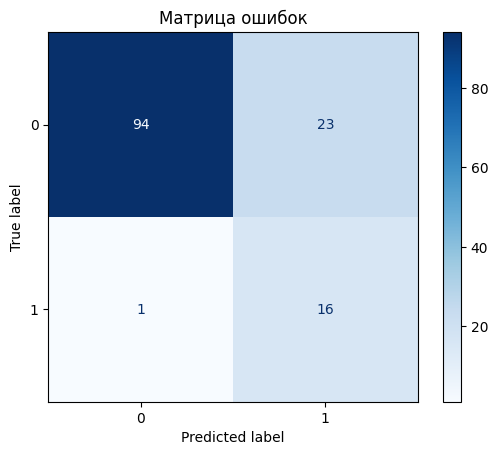


Feature Importances:
                                            feature  importance
37                      Позиция студента в рейтинге         347
1                            Cумма баллов испытаний         234
7                  Полных лет на момент поступления         105
11                             fromSverdlovskRegion          98
9                           Общее количество долгов          83
8                         Общее количество пересдач          49
2                           Балл за инд. достижения          35
10                                 fromEkaterinburg          33
18                                          Заочная          20
0                                         Приоритет          19
31                            Код направления 1: 11          13
12                          Human Development Index           5
32                            Код направления 1: 27           4
3                                          Контракт           3
4                 

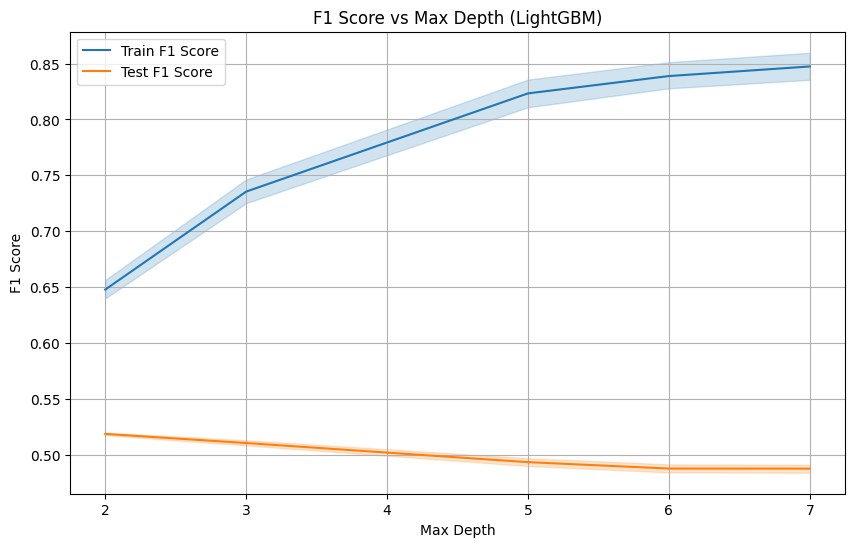

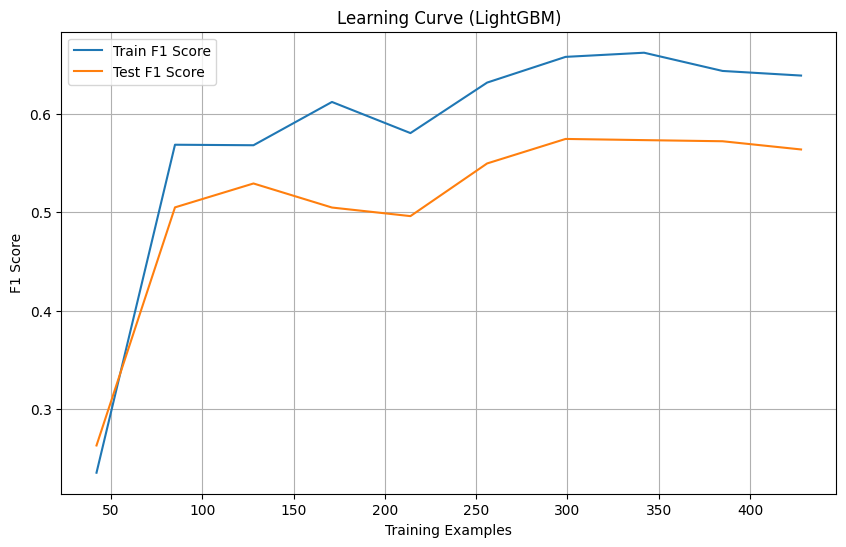

In [7]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import numpy as np
import os

save_dir = 'lightgbm/s_magistr'
os.makedirs(save_dir, exist_ok=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LGBMClassifier(
        random_state=42,
        verbose=-1,
        class_weight='balanced'
    ))
])

param_grid = [
    {
        'clf': [LGBMClassifier(
            random_state=42,
            verbose=-1,
            class_weight='balanced'
        )],
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [2, 3, 5, 6, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'clf__num_leaves': [8, 16, 32],
        'clf__min_child_samples': [5, 10, 20],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.7, 1.0]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_s_magistr, y_train_s_magistr)

y_pred = grid_search.predict(X_test_s_magistr)
best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/lightgbm_model_s_magistr.joblib')

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая модель:", best_model)
print("\nОтчёт классификации:\n", classification_report(y_test_s_magistr, y_pred))

cm = confusion_matrix(y_test_s_magistr, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig(os.path.join(save_dir, "confusion_matrix_lightgbm.png"))
plt.show()

importances = best_model.named_steps['clf'].feature_importances_
features = X_train_s_magistr.columns
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

results = pd.DataFrame(grid_search.cv_results_)
results_filtered = results[[
    'param_clf__max_depth',
    'mean_train_score',
    'mean_test_score'
]].copy()
results_filtered['param_clf__max_depth'] = pd.to_numeric(results_filtered['param_clf__max_depth'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_train_score', label='Train F1 Score')
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_test_score', label='Test F1 Score')
plt.title('F1 Score vs Max Depth (LightGBM)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "f1_vs_max_depth_lightgbm.png"))
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_s_magistr,
    y=y_train_s_magistr,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train F1 Score')
plt.plot(train_sizes, test_scores_mean, label='Test F1 Score')
plt.title('Learning Curve (LightGBM)')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "learning_curve_lightgbm.png"))
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


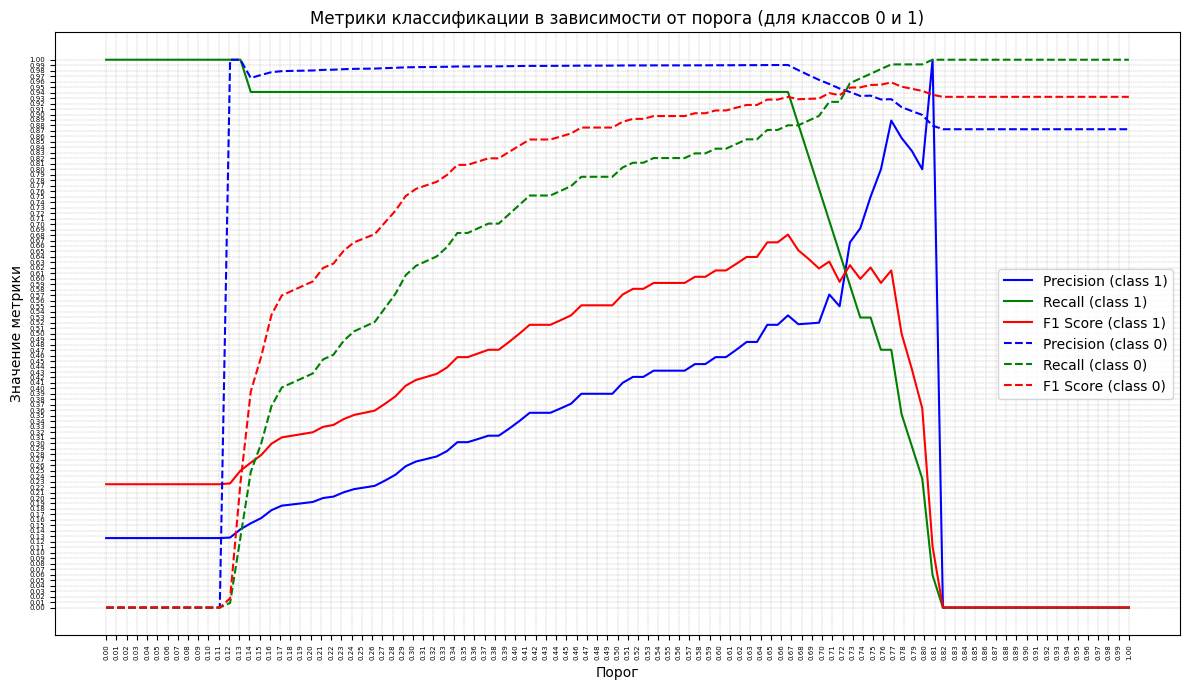

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import os

y_probs = grid_search.predict_proba(X_test_s_magistr)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1 = [], [], []
precisions_0, recalls_0, f1_scores_0 = [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_s_magistr, y_pred_thresh, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_s_magistr, y_pred_thresh, pos_label=0, zero_division=0))

save_path = 'lightgbm/s_magistr'

plt.figure(figsize=(12, 7))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='red')

plt.xticks(np.arange(0, 1.01, 0.01), rotation=90, fontsize=5)
plt.yticks(np.arange(0, 1.01, 0.01), fontsize=5)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.title('Метрики классификации в зависимости от порога (для классов 0 и 1)')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_path, 'metrics_vs_threshold_lightgbm.png'), dpi=300)
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Лучшие параметры: {'clf': LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1), 'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__min_child_samples': 5, 'clf__n_estimators': 100, 'clf__num_leaves': 32, 'clf__subsample': 0.8}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                                max_depth=7, min_child_samples=5, num_leaves=32,
                                random_state=42, subsample=0.8, verbose=-1))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       271
           1       0.71      0.75      0.73        52

    accuracy                           0.91       323
   macro avg       0.83      0.85      0.84       323
weighted avg       0.91      0.91      0.91       323



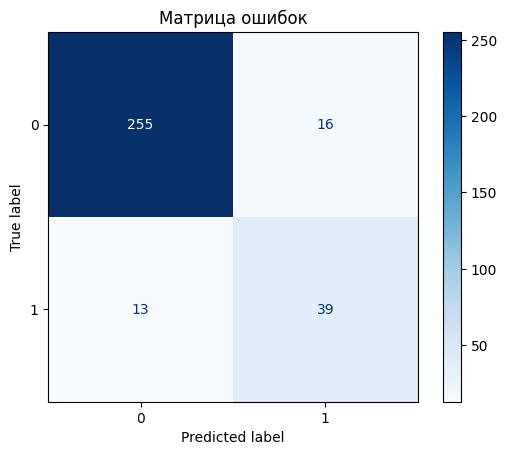


Feature Importances:
                                            feature  importance
39                      Позиция студента в рейтинге         624
1                            Cумма баллов испытаний         588
10                          Общее количество долгов         243
8                  Полных лет на момент поступления         223
3                           Балл за инд. достижения         126
0                                         Приоритет         125
13                          Human Development Index          93
9                         Общее количество пересдач          86
11                                 fromEkaterinburg          71
24                                 Профильная Школа          69
38                             Код направления 3: 4          68
7                                               Пол          64
33                            Код направления 1: 11          62
5                             Нуждается в общежитии          61
12                

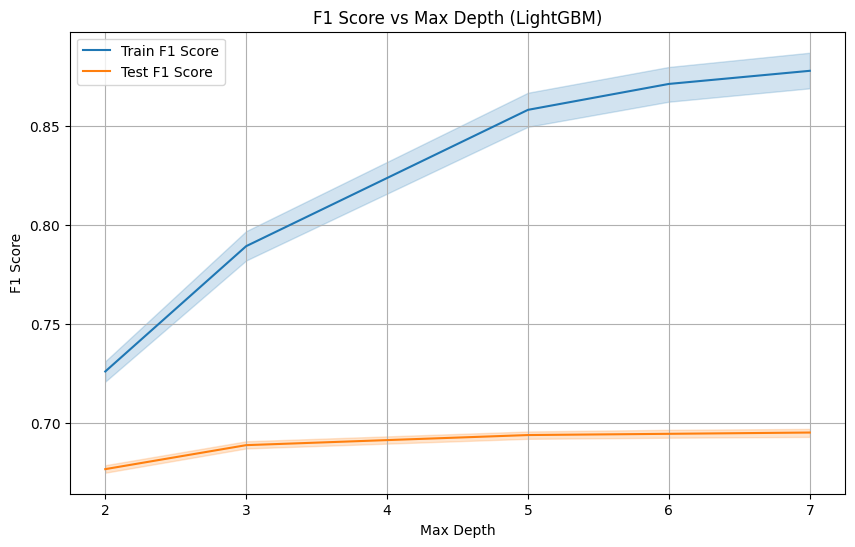

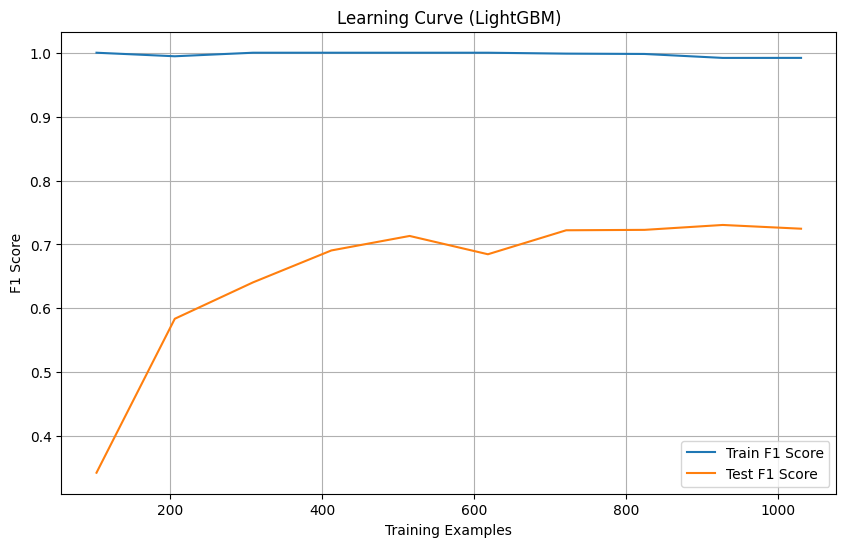

In [9]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import numpy as np
import os

save_dir = 'lightgbm/s_bak_spec'
os.makedirs(save_dir, exist_ok=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LGBMClassifier(
        random_state=42,
        verbose=-1,
        class_weight='balanced'
    ))
])

param_grid = [
    {
        'clf': [LGBMClassifier(
            random_state=42,
            verbose=-1,
            class_weight='balanced'
        )],
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [2, 3, 5, 6, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'clf__num_leaves': [8, 16, 32],
        'clf__min_child_samples': [5, 10, 20],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.7, 1.0]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_s_bak_spec, y_train_s_bak_spec)

y_pred = grid_search.predict(X_test_s_bak_spec)
best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/lightgbm_model_s_bak_spec.joblib')

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая модель:", best_model)
print("\nОтчёт классификации:\n", classification_report(y_test_s_bak_spec, y_pred))

cm = confusion_matrix(y_test_s_bak_spec, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig(os.path.join(save_dir, "confusion_matrix_lightgbm.png"))
plt.show()

importances = best_model.named_steps['clf'].feature_importances_
features = X_train_s_bak_spec.columns
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

results = pd.DataFrame(grid_search.cv_results_)
results_filtered = results[[
    'param_clf__max_depth',
    'mean_train_score',
    'mean_test_score'
]].copy()
results_filtered['param_clf__max_depth'] = pd.to_numeric(results_filtered['param_clf__max_depth'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_train_score', label='Train F1 Score')
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_test_score', label='Test F1 Score')
plt.title('F1 Score vs Max Depth (LightGBM)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "f1_vs_max_depth_lightgbm.png"))
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_s_bak_spec,
    y=y_train_s_bak_spec,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train F1 Score')
plt.plot(train_sizes, test_scores_mean, label='Test F1 Score')
plt.title('Learning Curve (LightGBM)')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "learning_curve_lightgbm.png"))
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


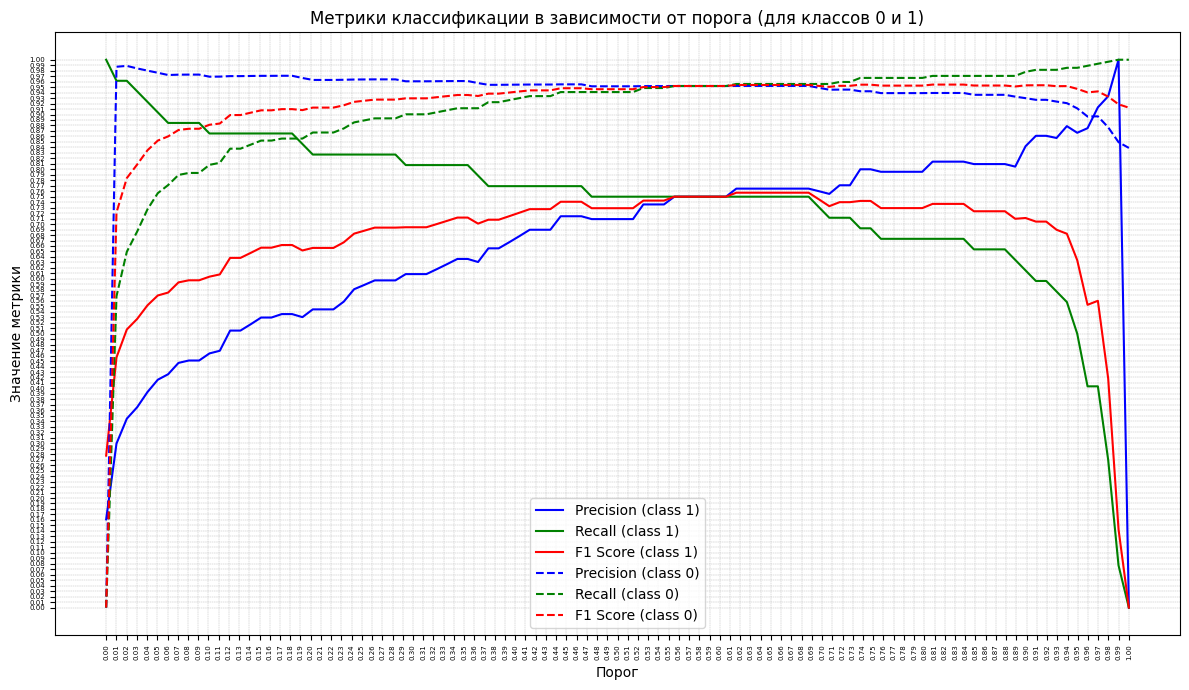

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import os

y_probs = grid_search.predict_proba(X_test_s_bak_spec)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1 = [], [], []
precisions_0, recalls_0, f1_scores_0 = [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_s_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_s_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))

save_path = 'lightgbm/s_bak_spec'

plt.figure(figsize=(12, 7))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='red')

plt.xticks(np.arange(0, 1.01, 0.01), rotation=90, fontsize=5)
plt.yticks(np.arange(0, 1.01, 0.01), fontsize=5)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.title('Метрики классификации в зависимости от порога (для классов 0 и 1)')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_path, 'metrics_vs_threshold_lightgbm.png'), dpi=300)
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Лучшие параметры: {'clf': LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1), 'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__min_child_samples': 10, 'clf__n_estimators': 100, 'clf__num_leaves': 8, 'clf__subsample': 0.8}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                max_depth=3, min_child_samples=10, num_leaves=8,
                                random_state=42, subsample=0.8, verbose=-1))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.87      0.68      0.77       117
           1       0.12      0.29      0.17        17

    accuracy                           0.63       134
   macro avg       0.49      0.49      0.47       134
weighted avg       0.77      0.63      0.69       134



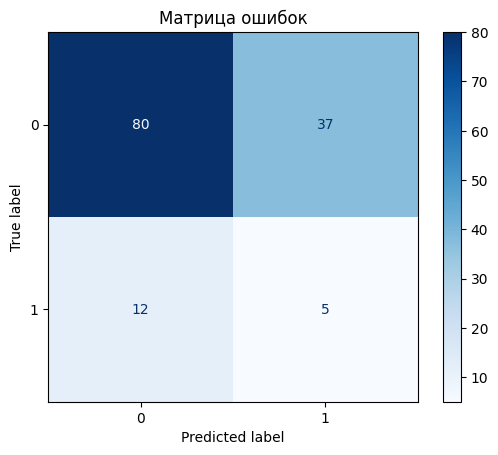


Feature Importances:
                                            feature  importance
1                            Cумма баллов испытаний         191
7                  Полных лет на момент поступления          94
0                                         Приоритет          40
34                             Код направления 3: 4          33
30                            Код направления 1: 27          29
4                             Нуждается в общежитии          21
9                              fromSverdlovskRegion          20
8                                  fromEkaterinburg          18
29                            Код направления 1: 11          18
2                           Балл за инд. достижения          15
6                                               Пол          15
10                          Human Development Index          11
32                             Код направления 3: 2          10
33                             Код направления 3: 3           9
28                

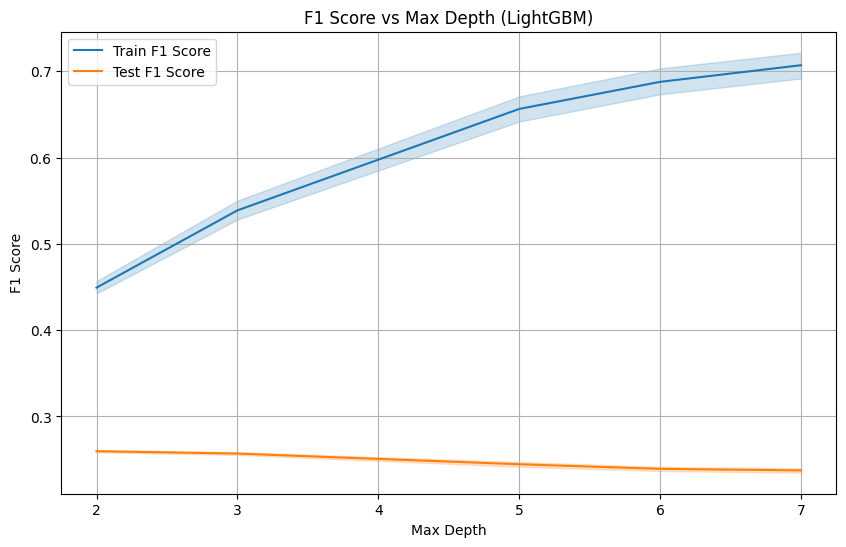

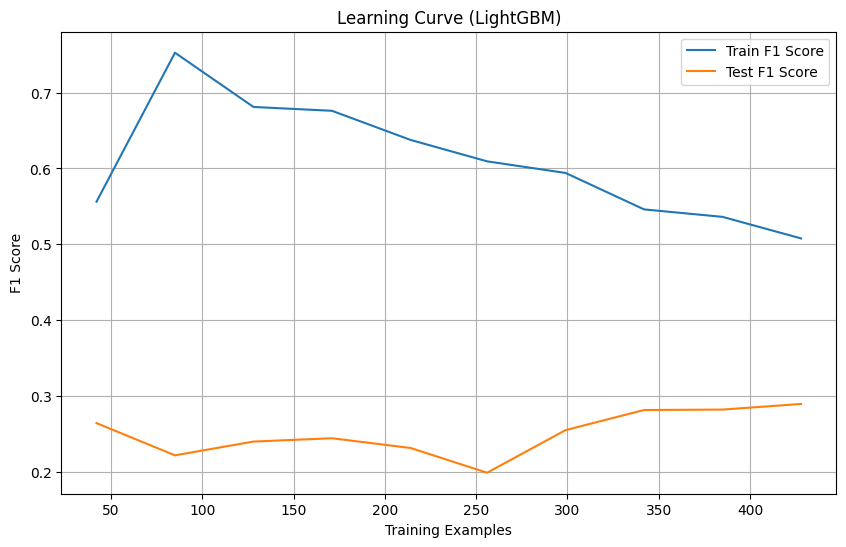

In [11]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import numpy as np
import os

save_dir = 'lightgbm/c1_magistr'
os.makedirs(save_dir, exist_ok=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LGBMClassifier(
        random_state=42,
        verbose=-1,
        class_weight='balanced'
    ))
])

param_grid = [
    {
        'clf': [LGBMClassifier(
            random_state=42,
            verbose=-1,
            class_weight='balanced'
        )],
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [2, 3, 5, 6, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'clf__num_leaves': [8, 16, 32],
        'clf__min_child_samples': [5, 10, 20],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.7, 1.0]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_c1_magistr, y_train_c1_magistr)

y_pred = grid_search.predict(X_test_c1_magistr)
best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/lightgbm_model_c1_magistr.joblib')

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая модель:", best_model)
print("\nОтчёт классификации:\n", classification_report(y_test_c1_magistr, y_pred))

cm = confusion_matrix(y_test_c1_magistr, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig(os.path.join(save_dir, "confusion_matrix_lightgbm.png"))
plt.show()

importances = best_model.named_steps['clf'].feature_importances_
features = X_train_c1_magistr.columns
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

results = pd.DataFrame(grid_search.cv_results_)
results_filtered = results[[
    'param_clf__max_depth',
    'mean_train_score',
    'mean_test_score'
]].copy()
results_filtered['param_clf__max_depth'] = pd.to_numeric(results_filtered['param_clf__max_depth'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_train_score', label='Train F1 Score')
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_test_score', label='Test F1 Score')
plt.title('F1 Score vs Max Depth (LightGBM)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "f1_vs_max_depth_lightgbm.png"))
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_c1_magistr,
    y=y_train_c1_magistr,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train F1 Score')
plt.plot(train_sizes, test_scores_mean, label='Test F1 Score')
plt.title('Learning Curve (LightGBM)')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "learning_curve_lightgbm.png"))
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


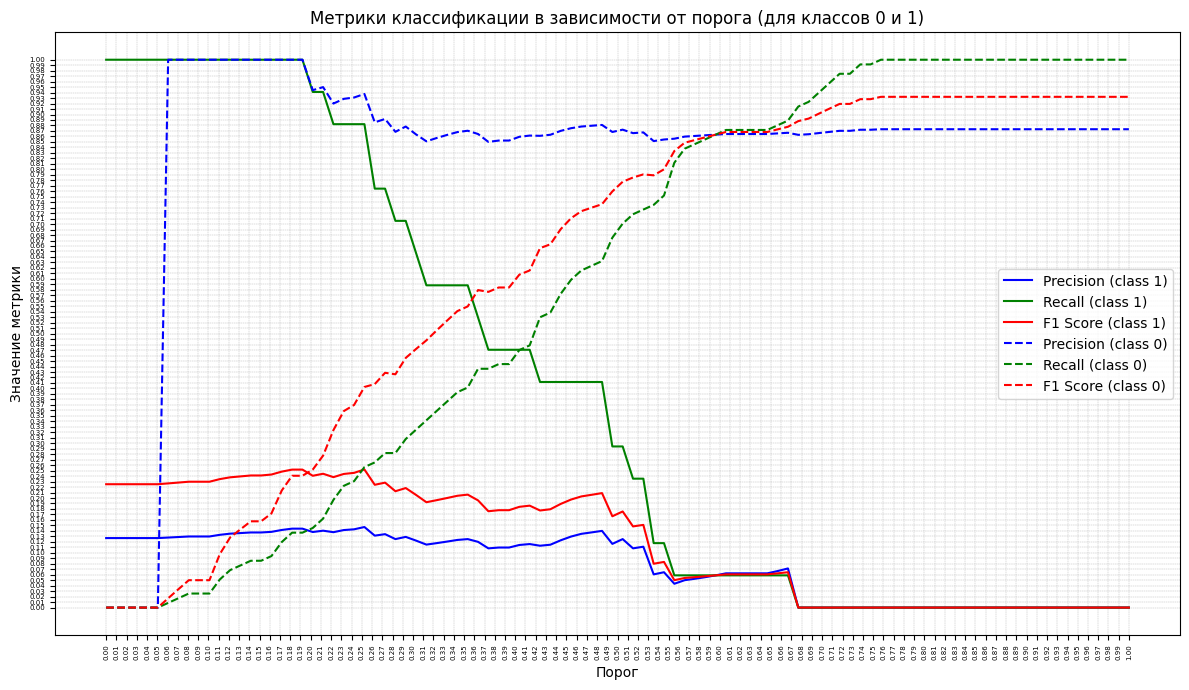

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import os

y_probs = grid_search.predict_proba(X_test_c1_magistr)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1 = [], [], []
precisions_0, recalls_0, f1_scores_0 = [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_c1_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_c1_magistr, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_c1_magistr, y_pred_thresh, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_c1_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_c1_magistr, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_c1_magistr, y_pred_thresh, pos_label=0, zero_division=0))

save_path = 'lightgbm/c1_magistr'

plt.figure(figsize=(12, 7))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='red')

plt.xticks(np.arange(0, 1.01, 0.01), rotation=90, fontsize=5)
plt.yticks(np.arange(0, 1.01, 0.01), fontsize=5)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.title('Метрики классификации в зависимости от порога (для классов 0 и 1)')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_path, 'metrics_vs_threshold_lightgbm.png'), dpi=300)
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Лучшие параметры: {'clf': LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1), 'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__min_child_samples': 10, 'clf__n_estimators': 150, 'clf__num_leaves': 8, 'clf__subsample': 0.8}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                                learning_rate=0.05, max_depth=5,
                                min_child_samples=10, n_estimators=150,
                                num_leaves=8, random_state=42, subsample=0.8,
                                verbose=-1))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       271
           1       0.37      0.65      0.47        52

    accuracy                           0.76       323
   macro avg       0.65      0.72      0.66       323
wei

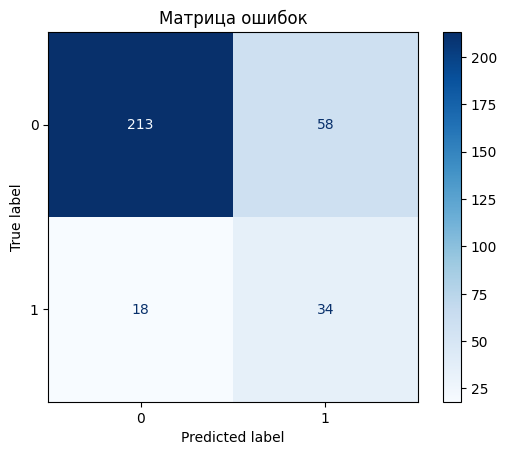


Feature Importances:
                                            feature  importance
1                            Cумма баллов испытаний         321
8                  Полных лет на момент поступления         131
3                           Балл за инд. достижения          80
0                                         Приоритет          59
11                          Human Development Index          51
19                                       Специалист          48
35                             Код направления 3: 3          39
32                            Код направления 1: 27          37
17                                          Заочная          28
22                                 Профильная Школа          25
18                                     Очно-заочная          24
7                                               Пол          24
9                                  fromEkaterinburg          24
14                                    Целевая квота          22
23                

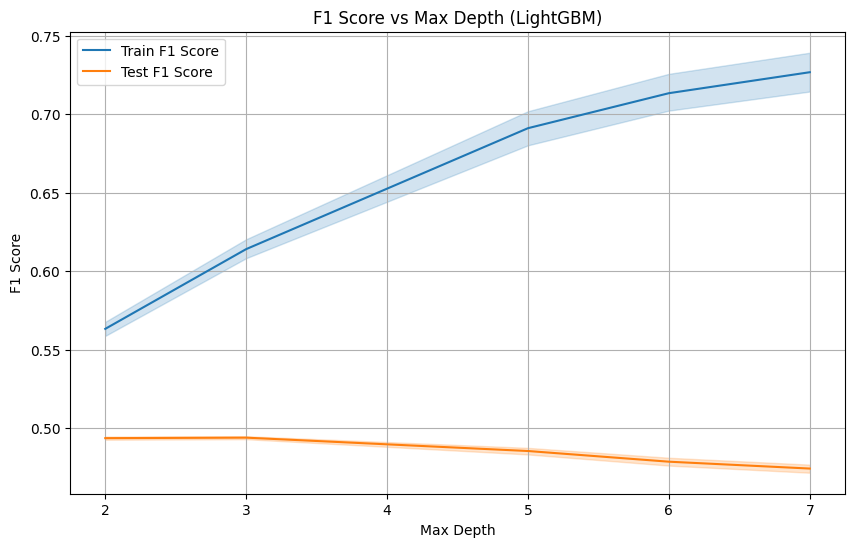

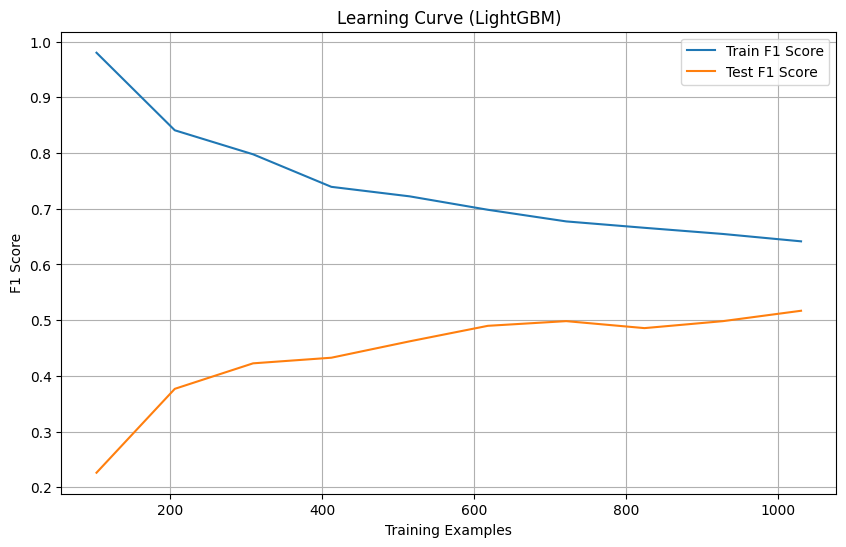

In [13]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import numpy as np
import os

save_dir = 'lightgbm/c1_bak_spec'
os.makedirs(save_dir, exist_ok=True)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LGBMClassifier(
        random_state=42,
        verbose=-1,
        class_weight='balanced'
    ))
])

param_grid = [
    {
        'clf': [LGBMClassifier(
            random_state=42,
            verbose=-1,
            class_weight='balanced'
        )],
        'clf__n_estimators': [50, 100, 150],
        'clf__max_depth': [2, 3, 5, 6, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'clf__num_leaves': [8, 16, 32],
        'clf__min_child_samples': [5, 10, 20],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.7, 1.0]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_c1_bak_spec, y_train_c1_bak_spec)

y_pred = grid_search.predict(X_test_c1_bak_spec)
best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/lightgbm_model_c1_bak_spec.joblib')

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая модель:", best_model)
print("\nОтчёт классификации:\n", classification_report(y_test_c1_bak_spec, y_pred))

cm = confusion_matrix(y_test_c1_bak_spec, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.savefig(os.path.join(save_dir, "confusion_matrix_lightgbm.png"))
plt.show()

importances = best_model.named_steps['clf'].feature_importances_
features = X_train_c1_bak_spec.columns
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

results = pd.DataFrame(grid_search.cv_results_)
results_filtered = results[[
    'param_clf__max_depth',
    'mean_train_score',
    'mean_test_score'
]].copy()
results_filtered['param_clf__max_depth'] = pd.to_numeric(results_filtered['param_clf__max_depth'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_train_score', label='Train F1 Score')
sns.lineplot(data=results_filtered, x='param_clf__max_depth', y='mean_test_score', label='Test F1 Score')
plt.title('F1 Score vs Max Depth (LightGBM)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "f1_vs_max_depth_lightgbm.png"))
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_c1_bak_spec,
    y=y_train_c1_bak_spec,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='f1',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train F1 Score')
plt.plot(train_sizes, test_scores_mean, label='Test F1 Score')
plt.title('Learning Curve (LightGBM)')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "learning_curve_lightgbm.png"))
plt.show()

C:\Users\333\anaconda3\envs\pp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


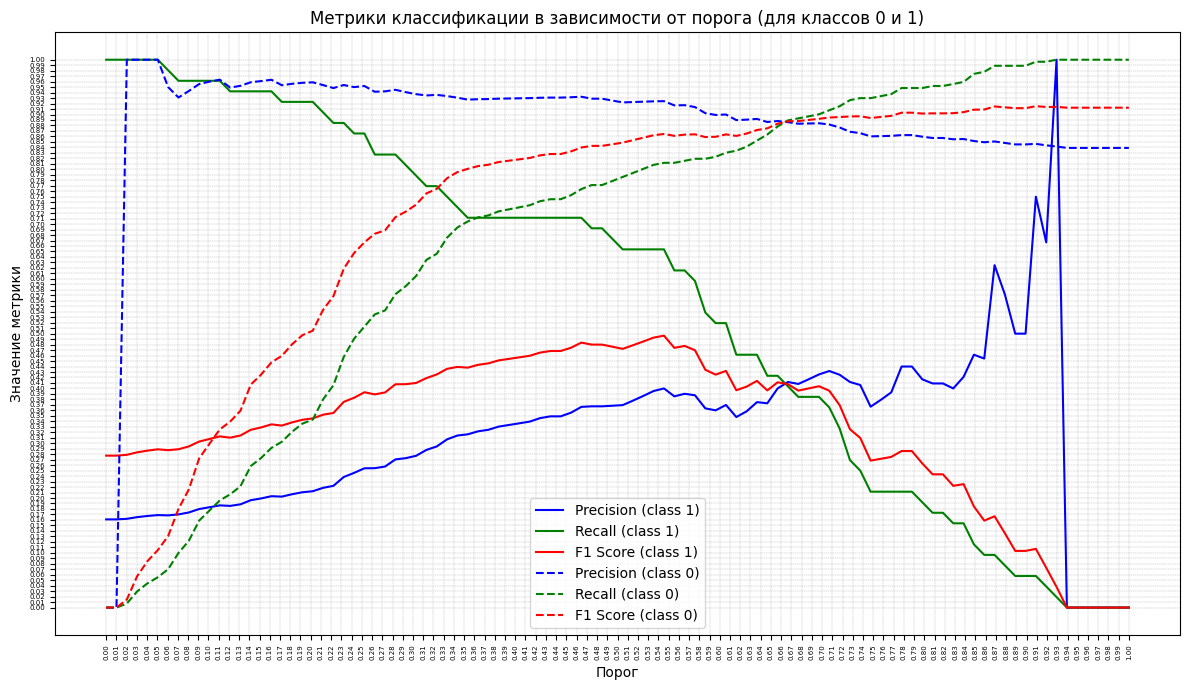

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import os

y_probs = grid_search.predict_proba(X_test_c1_bak_spec)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions_1, recalls_1, f1_scores_1 = [], [], []
precisions_0, recalls_0, f1_scores_0 = [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)

    precisions_1.append(precision_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    recalls_1.append(recall_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))
    f1_scores_1.append(f1_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=1, zero_division=0))

    precisions_0.append(precision_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    recalls_0.append(recall_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))
    f1_scores_0.append(f1_score(y_test_c1_bak_spec, y_pred_thresh, pos_label=0, zero_division=0))

save_path = 'lightgbm/c1_bak_spec'

plt.figure(figsize=(12, 7))

plt.plot(thresholds, precisions_1, label='Precision (class 1)', color='blue')
plt.plot(thresholds, recalls_1, label='Recall (class 1)', color='green')
plt.plot(thresholds, f1_scores_1, label='F1 Score (class 1)', color='red')

plt.plot(thresholds, precisions_0, '--', label='Precision (class 0)', color='blue')
plt.plot(thresholds, recalls_0, '--', label='Recall (class 0)', color='green')
plt.plot(thresholds, f1_scores_0, '--', label='F1 Score (class 0)', color='red')

plt.xticks(np.arange(0, 1.01, 0.01), rotation=90, fontsize=5)
plt.yticks(np.arange(0, 1.01, 0.01), fontsize=5)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.title('Метрики классификации в зависимости от порога (для классов 0 и 1)')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_path, 'metrics_vs_threshold_lightgbm.png'), dpi=300)
plt.show()